# Importación de librerias

In [109]:
!pip install -q ucimlrepo seaborn

In [110]:

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# Clasificación

En este trabajo, se utilizarán modelos de clasificación, con la finalidad de definir la fertilidad masculina en base al estilo de vida.

El dataset consta de 100 observaciones y 10 columnas, siendo estas:
<ul>
    <li /> Estación del año cuando se realizó el examen
    <li /> Edad del paciente al momento del análisis
    <li /> Enfermedades en la infancia táles como el polio o la gripe aviar
    <li /> Accidentes o traumas físicos graves
    <li /> Interveción quirurjica
    <li /> Fiebres altas en el último año
    <li /> Frecuencia en el consumo de alcohol
    <li /> Hábito de fuma
    <li /> Horas diarias sentado
    <li /> Diagnóstico normal o alterado, esta es la columna objetivo
</ul>
Se realizará un EDA para verificar el estado del dataset, y se probarán modelos de clasificación, ajustando los hiperparámetros para encontrar los mejores resultados para cada modelo.

## Importación de librerias

Para este trabajo, se utilizaron las siguientes librerias:
<ul>
    <li> Numpy: como dependencia de scikit learn </li>
    <li> Pandas: para trata del dataset como DataFrame </li>
    <li> Scikit-learn: para implementación de modelos </li>
    <li> XGBoost: para implementación del modelo XGBoost </li>
</ul>

In [159]:
!pip install -q xgboost ucimlrepo 

In [162]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from xgboost import XGBClassifier
import kagglehub

## Importación de dataset

Para la importación del dataset, se realizará a tráves del módulo de Kaggle.

In [111]:
path = kagglehub.dataset_download("muhamedyoussry/fertility-data-set") + "/fertility.csv"

print(path)

/home/fernando/.cache/kagglehub/datasets/muhamedyoussry/fertility-data-set/versions/1/fertility.csv


In [112]:
origin = pd.read_csv(path, sep=",")
df = origin.copy()

Se transforma el dataset a DataFrame de pandas para la trata de los datos y la implementación de los modelos.

In [113]:
df

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,spring,30,no,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,yes,no,more than 3 months ago,once a week,never,9,Altered
...,...,...,...,...,...,...,...,...,...,...
95,winter,30,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
96,winter,29,yes,no,no,more than 3 months ago,once a week,occasional,9,Normal
97,winter,30,yes,yes,yes,more than 3 months ago,hardly ever or never,never,6,Normal
98,winter,30,yes,no,yes,more than 3 months ago,hardly ever or never,occasional,3,Normal


In [114]:
df.describe()

,Age,Number of hours spent sitting per day
count,100.000000,100.000000
mean,30.110000,10.800000
std,2.246861,33.616975
min,27.000000,1.000000
25%,28.000000,5.000000
50%,30.000000,7.000000
75%,32.000000,9.000000
max,36.000000,342.000000


Se transforman las columnas no numericas a numericas para facilitar el entrenamiento de los modelos, para esto se utiliza el modelo Label Encoders para asignar un valor numérico según la descripción de los posibles valores.

In [115]:
categorical_cols = df.select_dtypes(include="object").columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

for col, le in label_encoders.items():
    print(f"{col}:")
    for i, class_ in enumerate(le.classes_):
        print(f" {i} -> {class_}")

Season:
 0 -> fall
 1 -> spring
 2 -> summer
 3 -> winter
Childish diseases:
 0 -> no
 1 -> yes
Accident or serious trauma:
 0 -> no
 1 -> yes
Surgical intervention:
 0 -> no
 1 -> yes
High fevers in the last year:
 0 -> less than 3 months ago
 1 -> more than 3 months ago
 2 -> no
Frequency of alcohol consumption:
 0 -> every day
 1 -> hardly ever or never
 2 -> once a week
 3 -> several times a day
 4 -> several times a week
Smoking habit:
 0 -> daily
 1 -> never
 2 -> occasional
Diagnosis:
 0 -> Altered
 1 -> Normal


In [117]:
df.head()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,1,30,0,1,1,1,2,2,16,1
1,1,35,1,0,1,1,2,0,6,0
2,1,27,1,0,0,1,1,1,9,1
3,1,32,0,1,1,1,1,1,7,1
4,1,30,1,1,0,1,2,1,9,0


Se revisarán los valores distintos de todas las columnas para comprobar la consistencia de los datos.

In [118]:
for col in df.columns:
    print(df[col].value_counts(sort=True), "\n\n")

Season
1    37
0    31
3    28
2     4
Name: count, dtype: int64 


Age
28    28
30    27
32    17
27     7
33     7
29     5
35     4
36     2
31     2
34     1
Name: count, dtype: int64 


Childish diseases
1    87
0    13
Name: count, dtype: int64 


Accident or serious trauma
0    56
1    44
Name: count, dtype: int64 


Surgical intervention
1    51
0    49
Name: count, dtype: int64 


High fevers in the last year
1    63
2    28
0     9
Name: count, dtype: int64 


Frequency of alcohol consumption
1    40
2    39
4    19
3     1
0     1
Name: count, dtype: int64 


Smoking habit
1    56
2    23
0    21
Name: count, dtype: int64 


Number of hours spent sitting per day
5      17
9      16
7      13
6      11
8      10
11     10
3      10
16      3
14      3
10      2
1       2
2       1
342     1
18      1
Name: count, dtype: int64 


Diagnosis
1    88
0    12
Name: count, dtype: int64 




Se eliminará la observasión que posee 342 horas al día sentado, ya que es imposible poseer más de 24 horas al día en algo, por lo que es posible que toda la observación se vea comprometida con este valor

In [119]:
i = df[df["Number of hours spent sitting per day"]==342].index
df.drop(i, inplace=True)

In [120]:
df['Number of hours spent sitting per day'].value_counts()

Number of hours spent sitting per day
5     17
9     16
7     13
6     11
8     10
11    10
3     10
16     3
14     3
10     2
1      2
2      1
18     1
Name: count, dtype: int64

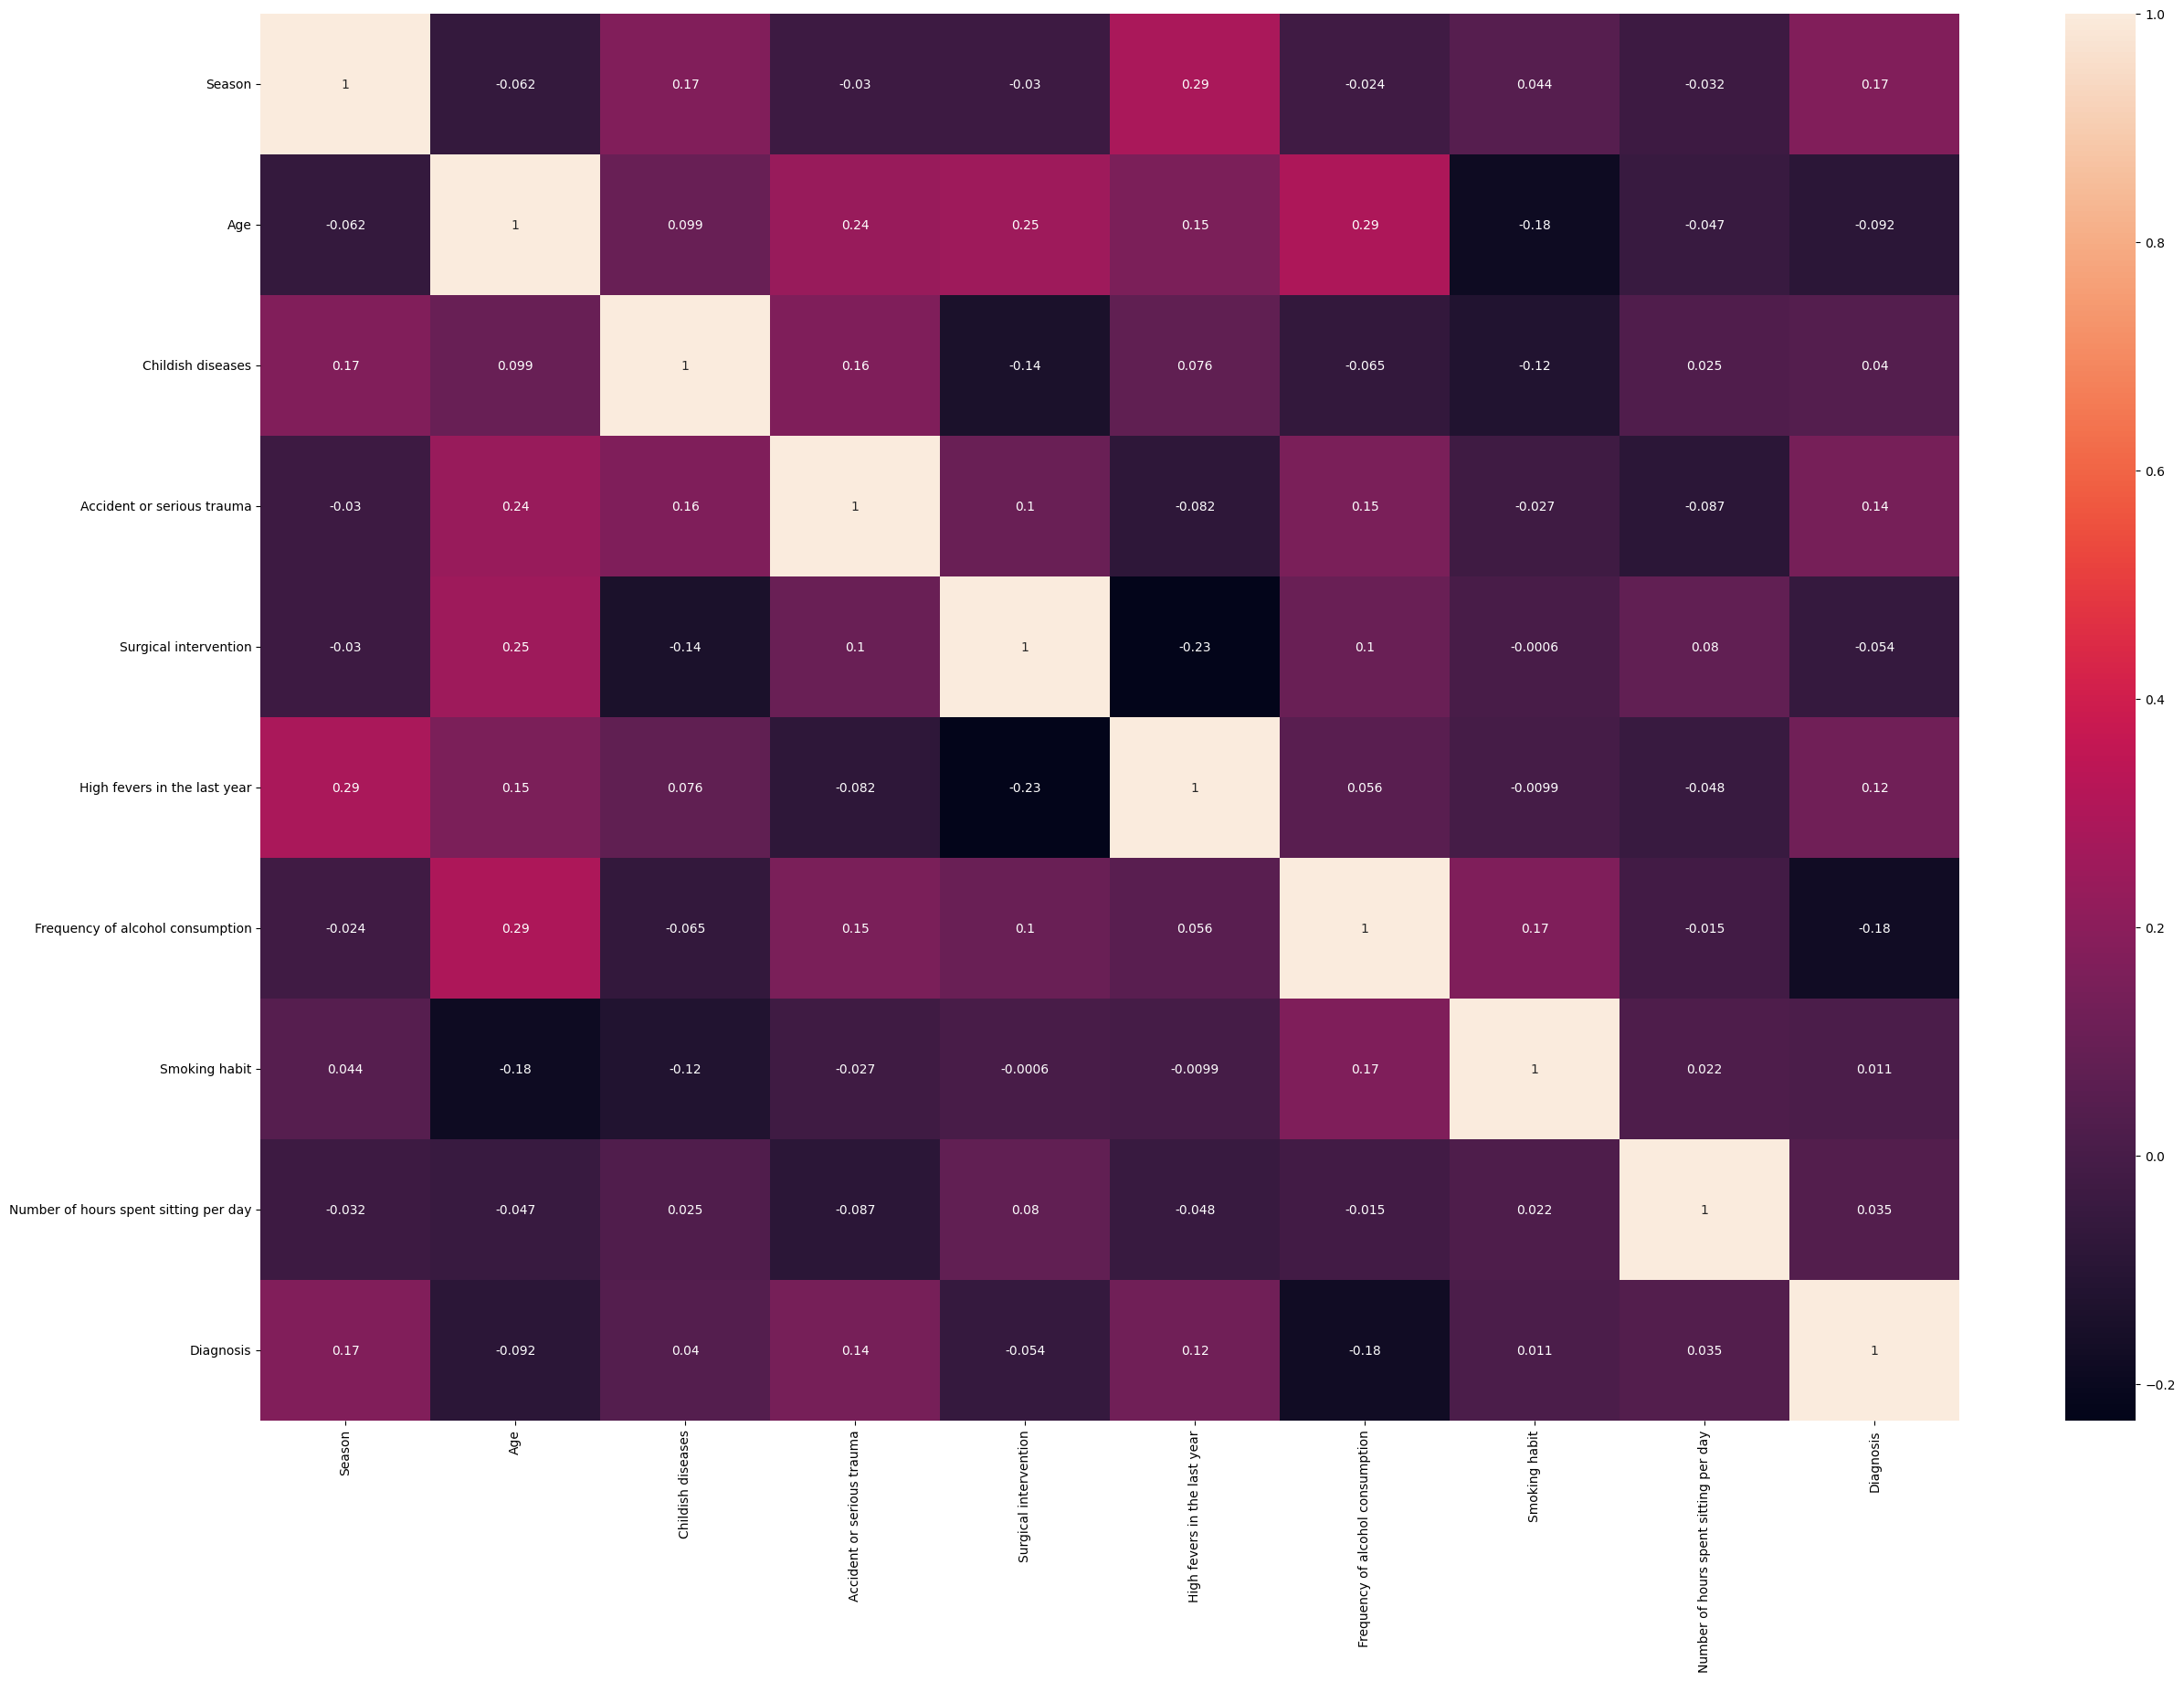

In [116]:
plt.figure(figsize=(30,20))
corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=True)
plt.show()

## Escalado de datos

Para este trabajo no se realiza un escalado, ya que se desconoce la volatilidad del cambio en los datos respecto a los resultados, al ser la gran mayoría valores categoricos y no numericos.

## Separación de dataset

Separamos el conjunto de datos en entrenamiento y testeo para comprobar el resultado de los modelos

In [143]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Diagnosis', axis=1), df.Diagnosis, test_size=0.1, random_state=42)

# Entrenamiento de modelos

Para todos los modelos se prepara una grilla de parámetros para realizar una optimización exhaustiva.

## Logistic Regression

In [147]:
lr = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],
    'tol': [0.0001, 0.001, 0.01, 0.1],
    'C': [0.0001, 0.001, 0.01, 0.1, 1],
    'random_state': [42],
    'solver': ['liblinear']
}

grid_lr = GridSearchCV(lr, param_grid=param_grid, cv=2)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'penalty': ['l1', 'l2'], 'random_state': [42],
                         'solver': ['liblinear'],
                         'tol': [0.0001, 0.001, 0.01, 0.1]})

In [155]:
y_lr_pred = grid_lr.predict(X_test)
print(classification_report(y_test, y_lr_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## Decision Tree

In [151]:
dt = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 3, 4, 5, 10, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [42]
}

grid_dt = GridSearchCV(dt, param_grid, cv=2)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20],
                         'min_samples_split': [2, 3, 4, 5, 10, 20],
                         'random_state': [42], 'splitter': ['best', 'random']})

In [156]:
y_dt_pred = grid_dt.predict(X_test)
print(classification_report(y_test, y_dt_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.90      0.95        10

    accuracy                           0.90        10
   macro avg       0.50      0.45      0.47        10
weighted avg       1.00      0.90      0.95        10



/home/fernando/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fernando/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fernando/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Random Forest

In [152]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 3, 4, 5, 10, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [42],
    'n_jobs': [-1]
}

grid_rf = GridSearchCV(rf, param_grid, cv=2)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20],
                         'min_samples_split': [2, 3, 4, 5, 10, 20],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-1],
                         'random_state': [42]})

In [157]:
y_rf_pred = grid_rf.predict(X_test)
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## XGBoost

In [153]:
xgb = XGBClassifier()

param_grid = [
    {'booster': ['gbtree'],
     'eta': [0, 0.25, 0.5, 0.75, 1],
     'gamma': [0, 0.5, 1, 5, 10],
     'lambda': [0, 1, 5, 10],
     'alpha': [0, 1, 5, 10],
     'max_depth': [1, 5, 10, 20, 30],
     'tree_method': ['auto', 'exact', 'approx', 'hist']
    },
    {'booster': ['gblinear'],
     'eta': [0, 0.25, 0.5, 0.75, 1],
     'gamma': [0, 0.5, 1, 5, 10],
     'lambda': [0, 1, 5, 10],
     'alpha': [0, 1, 5, 10],
    }
]

grid_xgb = GridSearchCV(xgb, param_grid, cv=2)
grid_xgb.fit(X_train, y_train)

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:52] WARNING: /work

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:54] WARNING: /work

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:55] WARNING: /work

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:57] WARNING: /work

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:58] WARNING: /work

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:09:59] WARNING: /work

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:00] WARNING: /work

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:01] WARNING: /work

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:02] WARNING: /work

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:06] WARNING: /work

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:07] WARNING: /work

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:08] WARNING: /work

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:09] WARNING: /work

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:10] WARNING: /work

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:12] WARNING: /work

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:13] WARNING: /work

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:14] WARNING: /work

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:15] WARNING: /work

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:16] WARNING: /work

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:18] WARNING: /work

/home/fernando/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [02:10:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "gamma" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid=[{'alpha': [0, 1, 5, 10], 'booster': ['gbtree'],
                          'eta': [0, 0.25, 0.5, 0.75, 1],
                          'gamma': [0, 0.5, 1, 5, 10], 'lambda': [0, 1, 5, 10],
                          'max_depth': [1, 5, 10, 20, 30],
                          'tree_method': ['auto', 'exact', 'approx', 'hist']},
                         {'alpha': [0, 1, 5, 10], 'booster': ['gblinear'],
                          'eta': [0, 0.25, 0.5, 0.75, 1],
                          'gamma': [0, 0.5, 1, 5, 10],
                          'lambda': [0, 1, 5, 10]}])

In [158]:
y_xgb_pred = grid_xgb.predict(X_test)
print(classification_report(y_test, y_xgb_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# Conclusiones

Los modelos XGBoost, Random Forest y regresión logística, obtuvieron valores del 100% en todas las métricas, lo cuál es preocupante, ya que es casi seguro afirmar que se tratan de sobreajustes, sin embargo, el modelo Decision Tree no llegó al 100% en sus metricas, solo estuvo muy cerca, con puntajes que superan el 95%, esto podría asegurar que el modelo está sobreajustado, como podría significar que los modelos de ensamble y regresión logística, simplemente son mejores para afrontar este problema.

Otra posibilidad, es que, debido a la escaza cantidad de observaciones en este conjunto de datos, los modelos se sobreajustaran, no por cantidad de repeticiones, si no por escasez de variedad.